# Coding Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to import the utils to this, we convert utils and networks to python.

In [ ]:
!jupyter nbconvert --to python '/content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb'
%run '/content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb'
!jupyter nbconvert --to python '/content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb'
%run '/content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb to python
[NbConvertApp] Writing 19903 bytes to /content/drive/MyDrive/ECE1512/ProjectB/networks.py
[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb to python
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('errorDetails' was unexpected)

Failed validating 'additionalProperties' in error:

On instance['cells'][0]['outputs'][0]:
{'ename': 'ModuleNotFoundError',
 'errorDetails': {'actions': [{'action': 'open_url',
                               'actionText': 'Open Examples',
                               'url': '/notebooks/snippets/importing_libraries.ipynb'}]},
 'evalue': 'ignored',
 'output_type': 'error',
 'traceback': ['\x1b---------------------------------------------------------...',
               '\x1bModuleNotFoundError\x1b                       '
               'Traceback (...',
               '\x1b<ipython-inpu

<ipython-input-2-d4a23aa8b8f3>:9: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate as scipyrotate


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import tqdm
import os
import copy
import time
from torchvision.utils import save_image
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/content/drive/MyDrive/ECE1512/ProjectB')
import utils
import networks


# MNIST Dataset Part





### Load Data Part


In [ ]:
mnist_dataset = 'MNIST'
mnist_data_path = './mnist_data'
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = utils.get_dataset(mnist_dataset, mnist_data_path)


100%|██████████| 9912422/9912422 [00:00<00:00, 124334485.43it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38689138.88it/s]


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41964087.23it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 23091550.02it/s]


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
mnist_train_loader = DataLoader(dst_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(dst_test, batch_size=64, shuffle=False)

# Part2

citation:
[1] Bo Zhao, Konda Reddy Mopuri, and Hakan Bilen. Dataset condensation with gradient matching.ICLR, 1(2):3, 2021. https://arxiv.org/abs/2006.05929

code citation:
VICO-UoE. (2022). DatasetCondensation [Code]. GitHub. https://github.com/VICO-UoE/DatasetCondensation


## Part 2(a)


Model/Device Setup

In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.model = 'ConvNet'
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = ipc
    self.Iteration = 10 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 2  #need be 20 as final test
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'

    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']

args = argument(device, 10)




FLOP Calculate





In [ ]:
len(dst_test)

10000

 answer: the FLOP for 10000 images in test set

In [24]:
! pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=969d0b4487c64fc75ec0090dc0c58fc2f252ce39cd80757f1120de209365009b
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=c0c502c0d759ca0877f7fd4075f29b4452dbac34dd0e0474b4adaa45e15c84b8
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath


In [25]:
from fvcore.nn import FlopCountAnalysis
MNIST_dataset = 'MNIST'
MNIST_data_path = './MNISTdata'
MNIST_channel, MNIST_im_size, MNIST_num_classes, MNIST_class_names, MNIST_mean, MNIST_std, MNIST_dst_train, MNIST_dst_test, MNIST_testloader = get_dataset(MNIST_dataset, MNIST_data_path)
MNIST_trainloader = torch.utils.data.DataLoader(MNIST_dst_train, batch_size=8, shuffle=True, num_workers=0)
model = get_network('ConvNet', MNIST_channel, MNIST_num_classes, MNIST_im_size).to(device) # get a random model
sythetic_img_all = torch.ones((100,1,28,28)).to(device)
flops_syn = FlopCountAnalysis(model, sythetic_img_all)
print('The FLOPs for 10000 real validation images is {}'.format(flops_syn.total()*100))

100%|██████████| 9912422/9912422 [00:00<00:00, 103799149.26it/s]


Extracting ./MNISTdata/MNIST/raw/train-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 126314592.10it/s]


Extracting ./MNISTdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38270238.81it/s]


Extracting ./MNISTdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20484439.54it/s]


Extracting ./MNISTdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



The FLOPs for 10000 real validation images is 492462080000


Train Model With Orginal Data-Set

In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0)
lr = float(args.lr_net)
Epoch = int(args.epoch_eval_train)
lr_schedule = [Epoch//2+1]
num_epochs = 20
for epoch in range(num_epochs):
    if epoch in lr_schedule:
      lr *= 0.1
      optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
    train_loss, train_acc = utils.epoch('train', mnist_train_loader, model, optimizer, criterion, args, aug=False)

    loss_test, acc_test = utils.epoch('test', testloader, model, optimizer, criterion, args, aug = False)

    scheduler.step()
    print(f'\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'\nTest Loss: {loss_test:.4f}, Test Acc: {acc_test:.4f}')




Train Loss: 0.0493, Train Acc: 0.9849

Test Loss: 0.0303, Test Acc: 0.9903

Train Loss: 0.0338, Train Acc: 0.9899

Test Loss: 0.0255, Test Acc: 0.9920

Train Loss: 0.0263, Train Acc: 0.9920

Test Loss: 0.0228, Test Acc: 0.9929

Train Loss: 0.0207, Train Acc: 0.9938

Test Loss: 0.0255, Test Acc: 0.9922

Train Loss: 0.0167, Train Acc: 0.9952

Test Loss: 0.0246, Test Acc: 0.9925

Train Loss: 0.0136, Train Acc: 0.9960

Test Loss: 0.0195, Test Acc: 0.9932

Train Loss: 0.0114, Train Acc: 0.9968

Test Loss: 0.0200, Test Acc: 0.9945

Train Loss: 0.0088, Train Acc: 0.9977

Test Loss: 0.0179, Test Acc: 0.9944

Train Loss: 0.0075, Train Acc: 0.9982

Test Loss: 0.0198, Test Acc: 0.9941

Train Loss: 0.0059, Train Acc: 0.9989

Test Loss: 0.0179, Test Acc: 0.9943

Train Loss: 0.0049, Train Acc: 0.9991

Test Loss: 0.0163, Test Acc: 0.9951

Train Loss: 0.0041, Train Acc: 0.9994

Test Loss: 0.0166, Test Acc: 0.9945

Train Loss: 0.0034, Train Acc: 0.9996

Test Loss: 0.0158, Test Acc: 0.9953

Train Loss:

## Part 2.(B)  

In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = 10
    self.Iteration = 100 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 20
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'
    self.init = 'real'
    self.eval_mode = 'S'
    self.save_path = "MNISTresult"



    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']




In [ ]:
# Train
def DataD_GradientM(Net, args):
  '''
    itype:
      Net -> str(): net type
      image_syn ->
      args -> obj: parameters
    rtype:
      data_save, visual_save, test_acc, train_acc -> list[],list[],list[],list[]
  '''
  if not os.path.exists(args.save_path):
    os.mkdir(args.save_path)

  eval_it_pool = list(range(0, args.Iteration + 1, 20))



  # record accuracy of each model
  records = dict()



  records[model] = []

  ''' orgainize image part '''
  indices_class = [[] for c in range(num_classes)]
  images_all = [torch.unsqueeze(dst_train[i][0], dim=0) for i in range(len(dst_train))]
  labels_all = [dst_train[i][1] for i in range(len(dst_train))]

  for i, lab in enumerate(labels_all):
      indices_class[lab].append(i)

  images_all = torch.cat(images_all, dim=0).to(args.device)
  labels_all = torch.tensor(labels_all, dtype=torch.long, device=args.device)

  for c in range(num_classes):
      print('class c = %d: %d real images'%(c, len(indices_class[c])))

  def get_images(c, n): # get random n images from class c
      idx_shuffle = np.random.permutation(indices_class[c])[:n]
      return images_all[idx_shuffle]

  '''initialize the synthetic data '''
  image_syn = torch.randn(size=(args.num_classes*args.ipc, args.channel, args.im_size[0], args.im_size[1]), dtype=torch.float, requires_grad=True, device=args.device)
  label_syn = torch.tensor([i // args.num_classes for i in range(args.num_classes * args.ipc)],dtype=torch.long, device=args.device)

  if args.init == 'real':
    print('initialize synthetic data from random real images')
    for c in range(args.num_classes):
      image_syn.data[c*args.ipc:(c+1)*args.ipc] = get_images(c, args.ipc).detach().data
  else:
    print('initialize synthetic data from random noise')

  ''' train '''
  data_save = []   #final syn-dataset (data_save[0][0] = images; data_save[0][1] = labels)
  test_acc = []    #record test accuracy of every iteration
  train_acc = []   #record train accuracy of every iteration
  all_losses =[]

  optimizer_img = torch.optim.SGD([image_syn, ], lr=args.lr_img, momentum=0.5)
  optimizer_img.zero_grad()
  criterion_img = nn.CrossEntropyLoss().to(args.device)


  for it in range(args.Iteration):
    print(f'Iteration {it}')
    ''' visualization of condensed images per class for MNIST datasets'''
    if it%20 == 0 or  it == (args.Iteration-1):
      save_name = os.path.join(args.save_path, args.init+'vis_%s_%dipc_iter%d.png'%( args.dataset, args.ipc, it))
      image_syn_vis = copy.deepcopy(image_syn.detach().cpu())
      for ch in range(channel):
          image_syn_vis[:, ch] = image_syn_vis[:, ch]  * std[ch] + mean[ch]
          image_syn_vis[image_syn_vis<0] = 0.0
          image_syn_vis[image_syn_vis>1] = 1.0
          save_image(image_syn_vis, save_name, nrow=args.ipc) # Trying normalize = True/False may get better visual effects.



    ''' initial theta '''
    net = utils.get_network(NET,args.channel,args.num_classes, args.im_size).to(args.device)
    net.train()
    net_parameters = list(net.parameters())
    optimizer_net = torch.optim.SGD(net.parameters(), lr=args.lr_net)
    optimizer_net.zero_grad()

    for ol in tqdm.tqdm(range(args.outer_loop)): #outer loop
      loss = torch.tensor(0.0).to(args.device)
      for c in range(args.num_classes): #class loop
        ''' Sample a minibatch pair BTc ∼ T and BSc ∼ S '''
        img_real = get_images(c, args.batch_train)
        lab_real = torch.ones((img_real.shape[0],), device=args.device, dtype=torch.long) * c
        img_syn = image_syn[c*args.ipc:(c+1)*args.ipc].reshape((args.ipc, args.channel, args.im_size[0], args.im_size[1]))
        lab_syn = torch.ones((args.ipc,), device=args.device, dtype=torch.long) * c

        if args.dsa:
          seed = int(time.time() * 1000) % 100000
          img_real = utils.DiffAugment(img_real, args.dsa_strategy, seed=seed, param=args.dsa_param)
          img_syn = utils.DiffAugment(img_syn, args.dsa_strategy, seed=seed, param=args.dsa_param)


        ''' compute loss for both minibatch '''
        output_real = net(img_real)
        loss_real = criterion_img(output_real, lab_real)
        gw_real = torch.autograd.grad(loss_real, net_parameters)
        gw_real = list((_.detach().clone() for _ in gw_real))

        output_synt = net(img_syn)
        loss_synt = criterion_img(output_synt, lab_syn)
        gw_synt = torch.autograd.grad(loss_synt, net_parameters, create_graph=True)

        loss += utils.match_loss(gw_synt, gw_real, args)

      ''' update '''
      optimizer_img.zero_grad()
      loss.backward()
      optimizer_img.step()
      if ol == args.outer_loop - 1:
        break

      image_syn_train, label_syn_train = copy.deepcopy(image_syn.detach()), copy.deepcopy(label_syn.detach())
      dst_syn_train = utils.TensorDataset(image_syn_train, label_syn_train)
      trainloader = torch.utils.data.DataLoader(dst_syn_train, batch_size=args.batch_train, shuffle=True, num_workers=0)
      ''' inner outer '''
      for inner in range(args.inner_loop):
        utils.epoch('train', trainloader, net, optimizer_net, criterion_img, args, aug = True if args.dsa else False)

    ''' evaluate '''
    args.epoch_eval_train = 100
    net_eval = utils.get_network(NET, channel, num_classes, im_size).to(args.device) # get a random model
    image_syn_eval, label_syn_eval = copy.deepcopy(image_syn.detach()), copy.deepcopy(label_syn.detach())
    _, acc_train, acc_test = utils.evaluate_synset(it, net_eval, image_syn_eval, label_syn_eval, testloader, args)
    test_acc.append(acc_test)
    train_acc.append(acc_train)

    '''Save the synthetic data result'''
    if it == (args.Iteration-1):
      data_save.append([copy.deepcopy(image_syn.detach().cpu()), copy.deepcopy(label_syn.detach().cpu())])
      torch.save({'data': data_save}, os.path.join(args.save_path, args.init+'res_%s_%dipc.pt'%(args.dataset, args.ipc)))
      print("The Final Accuracy for the sythetic data result: ", str(test_acc[-1]))
  return data_save,  test_acc, train_acc





In [ ]:
args = argument(device, 10)
NET = "ConvNet"
# image_syn, label_syn = init_syn(args, 'real')
data_save,  test_acc, train_acc = DataD_GradientM(NET, args)

class c = 0: 5923 real images
class c = 1: 6742 real images
class c = 2: 5958 real images
class c = 3: 6131 real images
class c = 4: 5842 real images
class c = 5: 5421 real images
class c = 6: 5918 real images
class c = 7: 6265 real images
class c = 8: 5851 real images
class c = 9: 5949 real images
initialize synthetic data from random real images
Iteration 0


 90%|█████████ | 9/10 [00:17<00:01,  1.96s/it]


[2023-12-05 03:05:13] Evaluate_00: epoch = 0100 train time = 4 s train loss = 0.283096 train acc = 0.9300, test acc = 0.9406
Iteration 1


 90%|█████████ | 9/10 [00:09<00:01,  1.11s/it]


[2023-12-05 03:05:29] Evaluate_01: epoch = 0100 train time = 4 s train loss = 0.235343 train acc = 0.9400, test acc = 0.9511
Iteration 2


 90%|█████████ | 9/10 [00:10<00:01,  1.12s/it]


[2023-12-05 03:05:46] Evaluate_02: epoch = 0100 train time = 4 s train loss = 0.271785 train acc = 0.9200, test acc = 0.9542
Iteration 3


 90%|█████████ | 9/10 [00:10<00:01,  1.12s/it]


[2023-12-05 03:06:02] Evaluate_03: epoch = 0100 train time = 4 s train loss = 0.277622 train acc = 0.9200, test acc = 0.9532
Iteration 4


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-12-05 03:06:19] Evaluate_04: epoch = 0100 train time = 3 s train loss = 0.324812 train acc = 0.9300, test acc = 0.9580
Iteration 5


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:06:36] Evaluate_05: epoch = 0100 train time = 3 s train loss = 0.320169 train acc = 0.9000, test acc = 0.9546
Iteration 6


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:06:52] Evaluate_06: epoch = 0100 train time = 3 s train loss = 0.252473 train acc = 0.9200, test acc = 0.9586
Iteration 7


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:07:09] Evaluate_07: epoch = 0100 train time = 3 s train loss = 0.211422 train acc = 0.9700, test acc = 0.9573
Iteration 8


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:07:25] Evaluate_08: epoch = 0100 train time = 3 s train loss = 0.346483 train acc = 0.9100, test acc = 0.9569
Iteration 9


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:07:42] Evaluate_09: epoch = 0100 train time = 3 s train loss = 0.323662 train acc = 0.9000, test acc = 0.9584
Iteration 10


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:08:00] Evaluate_10: epoch = 0100 train time = 3 s train loss = 0.296801 train acc = 0.9100, test acc = 0.9578
Iteration 11


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:08:17] Evaluate_11: epoch = 0100 train time = 4 s train loss = 0.335778 train acc = 0.9100, test acc = 0.9597
Iteration 12


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:08:35] Evaluate_12: epoch = 0100 train time = 4 s train loss = 0.359043 train acc = 0.9000, test acc = 0.9607
Iteration 13


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:08:52] Evaluate_13: epoch = 0100 train time = 4 s train loss = 0.270773 train acc = 0.9500, test acc = 0.9559
Iteration 14


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:09:10] Evaluate_14: epoch = 0100 train time = 4 s train loss = 0.335270 train acc = 0.9000, test acc = 0.9577
Iteration 15


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-12-05 03:09:27] Evaluate_15: epoch = 0100 train time = 3 s train loss = 0.311727 train acc = 0.9000, test acc = 0.9589
Iteration 16


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:09:43] Evaluate_16: epoch = 0100 train time = 3 s train loss = 0.317022 train acc = 0.9100, test acc = 0.9592
Iteration 17


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:10:00] Evaluate_17: epoch = 0100 train time = 3 s train loss = 0.317041 train acc = 0.9300, test acc = 0.9635
Iteration 18


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:10:16] Evaluate_18: epoch = 0100 train time = 3 s train loss = 0.398494 train acc = 0.9100, test acc = 0.9594
Iteration 19


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:10:33] Evaluate_19: epoch = 0100 train time = 3 s train loss = 0.315799 train acc = 0.9200, test acc = 0.9608
Iteration 20


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:10:49] Evaluate_20: epoch = 0100 train time = 3 s train loss = 0.270610 train acc = 0.9600, test acc = 0.9599
Iteration 21


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:11:06] Evaluate_21: epoch = 0100 train time = 3 s train loss = 0.295389 train acc = 0.9100, test acc = 0.9599
Iteration 22


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:11:23] Evaluate_22: epoch = 0100 train time = 3 s train loss = 0.290165 train acc = 0.9200, test acc = 0.9582
Iteration 23


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:11:40] Evaluate_23: epoch = 0100 train time = 3 s train loss = 0.211766 train acc = 0.9500, test acc = 0.9595
Iteration 24


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:11:58] Evaluate_24: epoch = 0100 train time = 4 s train loss = 0.360862 train acc = 0.9100, test acc = 0.9594
Iteration 25


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:12:16] Evaluate_25: epoch = 0100 train time = 4 s train loss = 0.273753 train acc = 0.9500, test acc = 0.9622
Iteration 26


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:12:33] Evaluate_26: epoch = 0100 train time = 4 s train loss = 0.320825 train acc = 0.9100, test acc = 0.9609
Iteration 27


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:12:50] Evaluate_27: epoch = 0100 train time = 3 s train loss = 0.295722 train acc = 0.9200, test acc = 0.9636
Iteration 28


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:13:06] Evaluate_28: epoch = 0100 train time = 3 s train loss = 0.403627 train acc = 0.8600, test acc = 0.9604
Iteration 29


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:13:23] Evaluate_29: epoch = 0100 train time = 3 s train loss = 0.328126 train acc = 0.9200, test acc = 0.9583
Iteration 30


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:13:39] Evaluate_30: epoch = 0100 train time = 3 s train loss = 0.367186 train acc = 0.8900, test acc = 0.9597
Iteration 31


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:13:56] Evaluate_31: epoch = 0100 train time = 3 s train loss = 0.435734 train acc = 0.8400, test acc = 0.9610
Iteration 32


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:14:12] Evaluate_32: epoch = 0100 train time = 3 s train loss = 0.235171 train acc = 0.9300, test acc = 0.9622
Iteration 33


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-12-05 03:14:29] Evaluate_33: epoch = 0100 train time = 4 s train loss = 0.358519 train acc = 0.9400, test acc = 0.9628
Iteration 34


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:14:46] Evaluate_34: epoch = 0100 train time = 3 s train loss = 0.407679 train acc = 0.9200, test acc = 0.9618
Iteration 35


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:15:03] Evaluate_35: epoch = 0100 train time = 3 s train loss = 0.279679 train acc = 0.9500, test acc = 0.9609
Iteration 36


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:15:20] Evaluate_36: epoch = 0100 train time = 3 s train loss = 0.327610 train acc = 0.9400, test acc = 0.9623
Iteration 37


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:15:38] Evaluate_37: epoch = 0100 train time = 4 s train loss = 0.302183 train acc = 0.9500, test acc = 0.9590
Iteration 38


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:15:56] Evaluate_38: epoch = 0100 train time = 4 s train loss = 0.331773 train acc = 0.9400, test acc = 0.9604
Iteration 39


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:16:13] Evaluate_39: epoch = 0100 train time = 4 s train loss = 0.252979 train acc = 0.9700, test acc = 0.9621
Iteration 40


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:16:30] Evaluate_40: epoch = 0100 train time = 4 s train loss = 0.391620 train acc = 0.8900, test acc = 0.9628
Iteration 41


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:16:47] Evaluate_41: epoch = 0100 train time = 3 s train loss = 0.312413 train acc = 0.9200, test acc = 0.9616
Iteration 42


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:17:03] Evaluate_42: epoch = 0100 train time = 3 s train loss = 0.420549 train acc = 0.8900, test acc = 0.9622
Iteration 43


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:17:19] Evaluate_43: epoch = 0100 train time = 3 s train loss = 0.403126 train acc = 0.8900, test acc = 0.9621
Iteration 44


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:17:36] Evaluate_44: epoch = 0100 train time = 3 s train loss = 0.385192 train acc = 0.9100, test acc = 0.9650
Iteration 45


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:17:52] Evaluate_45: epoch = 0100 train time = 3 s train loss = 0.459153 train acc = 0.9100, test acc = 0.9595
Iteration 46


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:18:09] Evaluate_46: epoch = 0100 train time = 3 s train loss = 0.448622 train acc = 0.8500, test acc = 0.9602
Iteration 47


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:18:26] Evaluate_47: epoch = 0100 train time = 3 s train loss = 0.280850 train acc = 0.9300, test acc = 0.9626
Iteration 48


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:18:43] Evaluate_48: epoch = 0100 train time = 3 s train loss = 0.482518 train acc = 0.8300, test acc = 0.9611
Iteration 49


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:19:00] Evaluate_49: epoch = 0100 train time = 3 s train loss = 0.343636 train acc = 0.9200, test acc = 0.9675
Iteration 50


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:19:18] Evaluate_50: epoch = 0100 train time = 4 s train loss = 0.420881 train acc = 0.8900, test acc = 0.9638
Iteration 51


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:19:36] Evaluate_51: epoch = 0100 train time = 4 s train loss = 0.339085 train acc = 0.9200, test acc = 0.9640
Iteration 52


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:19:53] Evaluate_52: epoch = 0100 train time = 4 s train loss = 0.396645 train acc = 0.9100, test acc = 0.9620
Iteration 53


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:20:11] Evaluate_53: epoch = 0100 train time = 4 s train loss = 0.321149 train acc = 0.9200, test acc = 0.9635
Iteration 54


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:20:27] Evaluate_54: epoch = 0100 train time = 3 s train loss = 0.448307 train acc = 0.8700, test acc = 0.9632
Iteration 55


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:20:44] Evaluate_55: epoch = 0100 train time = 3 s train loss = 0.422220 train acc = 0.8800, test acc = 0.9663
Iteration 56


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:21:00] Evaluate_56: epoch = 0100 train time = 3 s train loss = 0.467169 train acc = 0.8700, test acc = 0.9640
Iteration 57


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:21:17] Evaluate_57: epoch = 0100 train time = 3 s train loss = 0.318464 train acc = 0.9600, test acc = 0.9648
Iteration 58


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:21:34] Evaluate_58: epoch = 0100 train time = 3 s train loss = 0.336610 train acc = 0.9400, test acc = 0.9591
Iteration 59


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:21:50] Evaluate_59: epoch = 0100 train time = 3 s train loss = 0.439874 train acc = 0.8700, test acc = 0.9625
Iteration 60


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:22:07] Evaluate_60: epoch = 0100 train time = 3 s train loss = 0.431737 train acc = 0.8800, test acc = 0.9658
Iteration 61


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:22:24] Evaluate_61: epoch = 0100 train time = 3 s train loss = 0.433247 train acc = 0.8600, test acc = 0.9636
Iteration 62


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:22:41] Evaluate_62: epoch = 0100 train time = 3 s train loss = 0.408657 train acc = 0.8900, test acc = 0.9631
Iteration 63


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:22:59] Evaluate_63: epoch = 0100 train time = 4 s train loss = 0.390689 train acc = 0.8900, test acc = 0.9652
Iteration 64


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:23:17] Evaluate_64: epoch = 0100 train time = 4 s train loss = 0.384105 train acc = 0.9100, test acc = 0.9601
Iteration 65


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:23:34] Evaluate_65: epoch = 0100 train time = 4 s train loss = 0.366920 train acc = 0.9200, test acc = 0.9611
Iteration 66


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:23:51] Evaluate_66: epoch = 0100 train time = 4 s train loss = 0.347486 train acc = 0.9500, test acc = 0.9626
Iteration 67


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:24:07] Evaluate_67: epoch = 0100 train time = 3 s train loss = 0.364186 train acc = 0.9300, test acc = 0.9637
Iteration 68


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:24:24] Evaluate_68: epoch = 0100 train time = 3 s train loss = 0.422066 train acc = 0.8800, test acc = 0.9638
Iteration 69


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]


[2023-12-05 03:24:42] Evaluate_69: epoch = 0100 train time = 4 s train loss = 0.508456 train acc = 0.8700, test acc = 0.9620
Iteration 70


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:24:58] Evaluate_70: epoch = 0100 train time = 3 s train loss = 0.496278 train acc = 0.8200, test acc = 0.9633
Iteration 71


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:25:15] Evaluate_71: epoch = 0100 train time = 3 s train loss = 0.376058 train acc = 0.9000, test acc = 0.9610
Iteration 72


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:25:31] Evaluate_72: epoch = 0100 train time = 3 s train loss = 0.380784 train acc = 0.8900, test acc = 0.9630
Iteration 73


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:25:48] Evaluate_73: epoch = 0100 train time = 3 s train loss = 0.358901 train acc = 0.9300, test acc = 0.9619
Iteration 74


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:26:04] Evaluate_74: epoch = 0100 train time = 3 s train loss = 0.411133 train acc = 0.9300, test acc = 0.9644
Iteration 75


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:26:21] Evaluate_75: epoch = 0100 train time = 3 s train loss = 0.313166 train acc = 0.9500, test acc = 0.9609
Iteration 76


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:26:38] Evaluate_76: epoch = 0100 train time = 3 s train loss = 0.370855 train acc = 0.9000, test acc = 0.9635
Iteration 77


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:26:56] Evaluate_77: epoch = 0100 train time = 4 s train loss = 0.381095 train acc = 0.8900, test acc = 0.9619
Iteration 78


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:27:14] Evaluate_78: epoch = 0100 train time = 4 s train loss = 0.275979 train acc = 0.9400, test acc = 0.9632
Iteration 79


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:27:32] Evaluate_79: epoch = 0100 train time = 4 s train loss = 0.344323 train acc = 0.9200, test acc = 0.9626
Iteration 80


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:27:49] Evaluate_80: epoch = 0100 train time = 4 s train loss = 0.352432 train acc = 0.9100, test acc = 0.9615
Iteration 81


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:28:06] Evaluate_81: epoch = 0100 train time = 3 s train loss = 0.479809 train acc = 0.8600, test acc = 0.9624
Iteration 82


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:28:22] Evaluate_82: epoch = 0100 train time = 3 s train loss = 0.385120 train acc = 0.9000, test acc = 0.9644
Iteration 83


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:28:39] Evaluate_83: epoch = 0100 train time = 3 s train loss = 0.407278 train acc = 0.8900, test acc = 0.9648
Iteration 84


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:28:55] Evaluate_84: epoch = 0100 train time = 3 s train loss = 0.501822 train acc = 0.8400, test acc = 0.9651
Iteration 85


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:29:12] Evaluate_85: epoch = 0100 train time = 3 s train loss = 0.388598 train acc = 0.9100, test acc = 0.9614
Iteration 86


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:29:28] Evaluate_86: epoch = 0100 train time = 3 s train loss = 0.394936 train acc = 0.9100, test acc = 0.9633
Iteration 87


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]


[2023-12-05 03:29:46] Evaluate_87: epoch = 0100 train time = 4 s train loss = 0.386306 train acc = 0.8900, test acc = 0.9615
Iteration 88


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:30:03] Evaluate_88: epoch = 0100 train time = 3 s train loss = 0.449353 train acc = 0.8700, test acc = 0.9632
Iteration 89


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:30:21] Evaluate_89: epoch = 0100 train time = 4 s train loss = 0.383401 train acc = 0.9000, test acc = 0.9667
Iteration 90


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:30:38] Evaluate_90: epoch = 0100 train time = 4 s train loss = 0.442550 train acc = 0.8600, test acc = 0.9641
Iteration 91


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:30:56] Evaluate_91: epoch = 0100 train time = 4 s train loss = 0.371515 train acc = 0.9200, test acc = 0.9583
Iteration 92


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:31:13] Evaluate_92: epoch = 0100 train time = 4 s train loss = 0.358261 train acc = 0.9000, test acc = 0.9621
Iteration 93


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:31:30] Evaluate_93: epoch = 0100 train time = 3 s train loss = 0.346405 train acc = 0.8900, test acc = 0.9630
Iteration 94


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:31:46] Evaluate_94: epoch = 0100 train time = 3 s train loss = 0.479253 train acc = 0.9000, test acc = 0.9625
Iteration 95


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:32:03] Evaluate_95: epoch = 0100 train time = 3 s train loss = 0.417849 train acc = 0.8500, test acc = 0.9608
Iteration 96


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:32:19] Evaluate_96: epoch = 0100 train time = 3 s train loss = 0.380088 train acc = 0.9200, test acc = 0.9648
Iteration 97


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:32:36] Evaluate_97: epoch = 0100 train time = 3 s train loss = 0.442152 train acc = 0.9200, test acc = 0.9620
Iteration 98


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:32:52] Evaluate_98: epoch = 0100 train time = 3 s train loss = 0.451909 train acc = 0.8900, test acc = 0.9640
Iteration 99


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:33:09] Evaluate_99: epoch = 0100 train time = 3 s train loss = 0.443827 train acc = 0.8300, test acc = 0.9602
The Final Accuracy for the sythetic data result:  0.9602


## Part2(c)
Provide the visualization -> saved in the file

##Part 2(d)
condensed images are initialized with Gaussian noise and real data


In [ ]:
mnist_dataset = 'MNIST'
mnist_data_path = './mnist_data'
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = utils.get_dataset(mnist_dataset, mnist_data_path)

In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = 10
    self.Iteration = 100 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 20
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'
    self.init = 'noise'
    self.eval_mode = 'S'
    self.save_path = "MNISTresult"
    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']




In [ ]:
args = argument(device,ipc=10)
NET = "ConvNet"
# image_syn, label_syn = init_syn(args, 'real')
rn_mn_data_save, rn_mn_test_acc, rn_mn_train_acc = DataD_GradientM(NET, args)

class c = 0: 5923 real images
class c = 1: 6742 real images
class c = 2: 5958 real images
class c = 3: 6131 real images
class c = 4: 5842 real images
class c = 5: 5421 real images
class c = 6: 5918 real images
class c = 7: 6265 real images
class c = 8: 5851 real images
class c = 9: 5949 real images
initialize synthetic data from random noise
Iteration 0


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:33:52] Evaluate_00: epoch = 0100 train time = 3 s train loss = 0.670891 train acc = 0.8800, test acc = 0.6010
Iteration 1


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:34:09] Evaluate_01: epoch = 0100 train time = 3 s train loss = 0.726091 train acc = 0.8400, test acc = 0.7681
Iteration 2


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:34:25] Evaluate_02: epoch = 0100 train time = 3 s train loss = 0.630933 train acc = 0.8100, test acc = 0.7515
Iteration 3


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:34:42] Evaluate_03: epoch = 0100 train time = 3 s train loss = 0.659899 train acc = 0.8000, test acc = 0.7698
Iteration 4


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-12-05 03:34:59] Evaluate_04: epoch = 0100 train time = 3 s train loss = 0.690829 train acc = 0.7800, test acc = 0.7644
Iteration 5


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:35:15] Evaluate_05: epoch = 0100 train time = 3 s train loss = 0.459342 train acc = 0.8800, test acc = 0.8089
Iteration 6


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:35:32] Evaluate_06: epoch = 0100 train time = 3 s train loss = 0.572257 train acc = 0.8500, test acc = 0.8042
Iteration 7


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:35:48] Evaluate_07: epoch = 0100 train time = 3 s train loss = 0.454962 train acc = 0.8900, test acc = 0.8347
Iteration 8


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:36:05] Evaluate_08: epoch = 0100 train time = 3 s train loss = 0.513500 train acc = 0.8400, test acc = 0.8507
Iteration 9


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:36:23] Evaluate_09: epoch = 0100 train time = 3 s train loss = 0.353843 train acc = 0.9000, test acc = 0.8670
Iteration 10


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:36:41] Evaluate_10: epoch = 0100 train time = 4 s train loss = 0.439725 train acc = 0.9000, test acc = 0.8720
Iteration 11


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:36:58] Evaluate_11: epoch = 0100 train time = 4 s train loss = 0.353905 train acc = 0.9500, test acc = 0.8862
Iteration 12


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:37:16] Evaluate_12: epoch = 0100 train time = 4 s train loss = 0.412277 train acc = 0.8700, test acc = 0.8689
Iteration 13


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:37:32] Evaluate_13: epoch = 0100 train time = 4 s train loss = 0.393994 train acc = 0.9100, test acc = 0.8918
Iteration 14


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:37:49] Evaluate_14: epoch = 0100 train time = 3 s train loss = 0.389021 train acc = 0.9100, test acc = 0.8851
Iteration 15


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:38:05] Evaluate_15: epoch = 0100 train time = 3 s train loss = 0.431125 train acc = 0.8800, test acc = 0.8774
Iteration 16


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:38:22] Evaluate_16: epoch = 0100 train time = 3 s train loss = 0.446943 train acc = 0.8400, test acc = 0.8822
Iteration 17


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:38:38] Evaluate_17: epoch = 0100 train time = 3 s train loss = 0.268826 train acc = 0.9600, test acc = 0.9134
Iteration 18


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:38:55] Evaluate_18: epoch = 0100 train time = 3 s train loss = 0.531036 train acc = 0.8700, test acc = 0.9118
Iteration 19


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:39:12] Evaluate_19: epoch = 0100 train time = 3 s train loss = 0.323729 train acc = 0.9200, test acc = 0.9082
Iteration 20


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:39:29] Evaluate_20: epoch = 0100 train time = 3 s train loss = 0.353033 train acc = 0.8900, test acc = 0.9226
Iteration 21


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:39:46] Evaluate_21: epoch = 0100 train time = 3 s train loss = 0.371239 train acc = 0.9400, test acc = 0.9114
Iteration 22


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-12-05 03:40:03] Evaluate_22: epoch = 0100 train time = 3 s train loss = 0.434605 train acc = 0.8800, test acc = 0.9009
Iteration 23


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:40:21] Evaluate_23: epoch = 0100 train time = 3 s train loss = 0.278627 train acc = 0.9300, test acc = 0.9180
Iteration 24


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:40:39] Evaluate_24: epoch = 0100 train time = 4 s train loss = 0.405539 train acc = 0.9000, test acc = 0.9138
Iteration 25


 90%|█████████ | 9/10 [00:10<00:01,  1.13s/it]


[2023-12-05 03:40:56] Evaluate_25: epoch = 0100 train time = 4 s train loss = 0.267636 train acc = 0.9500, test acc = 0.9073
Iteration 26


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:41:13] Evaluate_26: epoch = 0100 train time = 4 s train loss = 0.270860 train acc = 0.9400, test acc = 0.9102
Iteration 27


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:41:30] Evaluate_27: epoch = 0100 train time = 4 s train loss = 0.400231 train acc = 0.9000, test acc = 0.9158
Iteration 28


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:41:47] Evaluate_28: epoch = 0100 train time = 3 s train loss = 0.376234 train acc = 0.9100, test acc = 0.9247
Iteration 29


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:42:03] Evaluate_29: epoch = 0100 train time = 3 s train loss = 0.313384 train acc = 0.9300, test acc = 0.9246
Iteration 30


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:42:20] Evaluate_30: epoch = 0100 train time = 3 s train loss = 0.324667 train acc = 0.9100, test acc = 0.9232
Iteration 31


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:42:37] Evaluate_31: epoch = 0100 train time = 3 s train loss = 0.329785 train acc = 0.9100, test acc = 0.9222
Iteration 32


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:42:53] Evaluate_32: epoch = 0100 train time = 3 s train loss = 0.343465 train acc = 0.9100, test acc = 0.9206
Iteration 33


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:43:10] Evaluate_33: epoch = 0100 train time = 3 s train loss = 0.360896 train acc = 0.9000, test acc = 0.9216
Iteration 34


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:43:27] Evaluate_34: epoch = 0100 train time = 3 s train loss = 0.322247 train acc = 0.9200, test acc = 0.9241
Iteration 35


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:43:44] Evaluate_35: epoch = 0100 train time = 3 s train loss = 0.230875 train acc = 0.9600, test acc = 0.9282
Iteration 36


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:44:01] Evaluate_36: epoch = 0100 train time = 4 s train loss = 0.356179 train acc = 0.9200, test acc = 0.9275
Iteration 37


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:44:19] Evaluate_37: epoch = 0100 train time = 4 s train loss = 0.377866 train acc = 0.8900, test acc = 0.9234
Iteration 38


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:44:37] Evaluate_38: epoch = 0100 train time = 4 s train loss = 0.344701 train acc = 0.9100, test acc = 0.9304
Iteration 39


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:44:55] Evaluate_39: epoch = 0100 train time = 4 s train loss = 0.307528 train acc = 0.9400, test acc = 0.9270
Iteration 40


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:45:12] Evaluate_40: epoch = 0100 train time = 3 s train loss = 0.293815 train acc = 0.9300, test acc = 0.9342
Iteration 41


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:45:28] Evaluate_41: epoch = 0100 train time = 3 s train loss = 0.363211 train acc = 0.9000, test acc = 0.9389
Iteration 42


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:45:45] Evaluate_42: epoch = 0100 train time = 3 s train loss = 0.321577 train acc = 0.9400, test acc = 0.9336
Iteration 43


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:46:01] Evaluate_43: epoch = 0100 train time = 3 s train loss = 0.303003 train acc = 0.9400, test acc = 0.9311
Iteration 44


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:46:18] Evaluate_44: epoch = 0100 train time = 3 s train loss = 0.343706 train acc = 0.9100, test acc = 0.9304
Iteration 45


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:46:35] Evaluate_45: epoch = 0100 train time = 3 s train loss = 0.311116 train acc = 0.9200, test acc = 0.9393
Iteration 46


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:46:53] Evaluate_46: epoch = 0100 train time = 3 s train loss = 0.379216 train acc = 0.8900, test acc = 0.9393
Iteration 47


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:47:11] Evaluate_47: epoch = 0100 train time = 4 s train loss = 0.244696 train acc = 0.9400, test acc = 0.9350
Iteration 48


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:47:28] Evaluate_48: epoch = 0100 train time = 4 s train loss = 0.327623 train acc = 0.8800, test acc = 0.9348
Iteration 49


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:47:45] Evaluate_49: epoch = 0100 train time = 4 s train loss = 0.455060 train acc = 0.8500, test acc = 0.9408
Iteration 50


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:48:02] Evaluate_50: epoch = 0100 train time = 3 s train loss = 0.375457 train acc = 0.9000, test acc = 0.9355
Iteration 51


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:48:19] Evaluate_51: epoch = 0100 train time = 3 s train loss = 0.331462 train acc = 0.9100, test acc = 0.9372
Iteration 52


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:48:35] Evaluate_52: epoch = 0100 train time = 3 s train loss = 0.301470 train acc = 0.9200, test acc = 0.9424
Iteration 53


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:48:52] Evaluate_53: epoch = 0100 train time = 3 s train loss = 0.328114 train acc = 0.9100, test acc = 0.9396
Iteration 54


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:49:08] Evaluate_54: epoch = 0100 train time = 3 s train loss = 0.385073 train acc = 0.9100, test acc = 0.9373
Iteration 55


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:49:25] Evaluate_55: epoch = 0100 train time = 3 s train loss = 0.421416 train acc = 0.9000, test acc = 0.9369
Iteration 56


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:49:42] Evaluate_56: epoch = 0100 train time = 3 s train loss = 0.466986 train acc = 0.9000, test acc = 0.9430
Iteration 57


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:50:00] Evaluate_57: epoch = 0100 train time = 4 s train loss = 0.256854 train acc = 0.9600, test acc = 0.9439
Iteration 58


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:50:18] Evaluate_58: epoch = 0100 train time = 4 s train loss = 0.337159 train acc = 0.9200, test acc = 0.9389
Iteration 59


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:50:36] Evaluate_59: epoch = 0100 train time = 4 s train loss = 0.370237 train acc = 0.8800, test acc = 0.9435
Iteration 60


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:50:53] Evaluate_60: epoch = 0100 train time = 4 s train loss = 0.351685 train acc = 0.9200, test acc = 0.9419
Iteration 61


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:51:10] Evaluate_61: epoch = 0100 train time = 4 s train loss = 0.556211 train acc = 0.8400, test acc = 0.9384
Iteration 62


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:51:26] Evaluate_62: epoch = 0100 train time = 3 s train loss = 0.366110 train acc = 0.9500, test acc = 0.9483
Iteration 63


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:51:43] Evaluate_63: epoch = 0100 train time = 3 s train loss = 0.520648 train acc = 0.8200, test acc = 0.9411
Iteration 64


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:52:00] Evaluate_64: epoch = 0100 train time = 3 s train loss = 0.297916 train acc = 0.9500, test acc = 0.9459
Iteration 65


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:52:16] Evaluate_65: epoch = 0100 train time = 3 s train loss = 0.331572 train acc = 0.9400, test acc = 0.9418
Iteration 66


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:52:33] Evaluate_66: epoch = 0100 train time = 3 s train loss = 0.401055 train acc = 0.9200, test acc = 0.9453
Iteration 67


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:52:49] Evaluate_67: epoch = 0100 train time = 3 s train loss = 0.334750 train acc = 0.9100, test acc = 0.9499
Iteration 68


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:53:06] Evaluate_68: epoch = 0100 train time = 3 s train loss = 0.291086 train acc = 0.9300, test acc = 0.9489
Iteration 69


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:53:23] Evaluate_69: epoch = 0100 train time = 3 s train loss = 0.344366 train acc = 0.9300, test acc = 0.9447
Iteration 70


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:53:41] Evaluate_70: epoch = 0100 train time = 4 s train loss = 0.305600 train acc = 0.9300, test acc = 0.9474
Iteration 71


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:53:59] Evaluate_71: epoch = 0100 train time = 4 s train loss = 0.285409 train acc = 0.9400, test acc = 0.9481
Iteration 72


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:54:16] Evaluate_72: epoch = 0100 train time = 4 s train loss = 0.300390 train acc = 0.9500, test acc = 0.9391
Iteration 73


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:54:33] Evaluate_73: epoch = 0100 train time = 4 s train loss = 0.303051 train acc = 0.9400, test acc = 0.9518
Iteration 74


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:54:50] Evaluate_74: epoch = 0100 train time = 3 s train loss = 0.358789 train acc = 0.9100, test acc = 0.9493
Iteration 75


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-12-05 03:55:08] Evaluate_75: epoch = 0100 train time = 4 s train loss = 0.353227 train acc = 0.9300, test acc = 0.9468
Iteration 76


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:55:25] Evaluate_76: epoch = 0100 train time = 4 s train loss = 0.333150 train acc = 0.9200, test acc = 0.9522
Iteration 77


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:55:41] Evaluate_77: epoch = 0100 train time = 3 s train loss = 0.422607 train acc = 0.8500, test acc = 0.9510
Iteration 78


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:55:58] Evaluate_78: epoch = 0100 train time = 3 s train loss = 0.300622 train acc = 0.9300, test acc = 0.9510
Iteration 79


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:56:14] Evaluate_79: epoch = 0100 train time = 3 s train loss = 0.431678 train acc = 0.8800, test acc = 0.9473
Iteration 80


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:56:31] Evaluate_80: epoch = 0100 train time = 3 s train loss = 0.373143 train acc = 0.9200, test acc = 0.9525
Iteration 81


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:56:48] Evaluate_81: epoch = 0100 train time = 3 s train loss = 0.366274 train acc = 0.9000, test acc = 0.9504
Iteration 82


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:57:04] Evaluate_82: epoch = 0100 train time = 3 s train loss = 0.377188 train acc = 0.9000, test acc = 0.9483
Iteration 83


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:57:21] Evaluate_83: epoch = 0100 train time = 3 s train loss = 0.306482 train acc = 0.9600, test acc = 0.9436
Iteration 84


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:57:39] Evaluate_84: epoch = 0100 train time = 3 s train loss = 0.389282 train acc = 0.8900, test acc = 0.9469
Iteration 85


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:57:57] Evaluate_85: epoch = 0100 train time = 4 s train loss = 0.343777 train acc = 0.9200, test acc = 0.9478
Iteration 86


 90%|█████████ | 9/10 [00:10<00:01,  1.14s/it]


[2023-12-05 03:58:14] Evaluate_86: epoch = 0100 train time = 4 s train loss = 0.420847 train acc = 0.8700, test acc = 0.9494
Iteration 87


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:58:31] Evaluate_87: epoch = 0100 train time = 4 s train loss = 0.347102 train acc = 0.9300, test acc = 0.9440
Iteration 88


 90%|█████████ | 9/10 [00:10<00:01,  1.15s/it]


[2023-12-05 03:58:48] Evaluate_88: epoch = 0100 train time = 3 s train loss = 0.314055 train acc = 0.9500, test acc = 0.9485
Iteration 89


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:59:05] Evaluate_89: epoch = 0100 train time = 3 s train loss = 0.359300 train acc = 0.9200, test acc = 0.9499
Iteration 90


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:59:21] Evaluate_90: epoch = 0100 train time = 3 s train loss = 0.500968 train acc = 0.8400, test acc = 0.9481
Iteration 91


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:59:38] Evaluate_91: epoch = 0100 train time = 3 s train loss = 0.301461 train acc = 0.9500, test acc = 0.9512
Iteration 92


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 03:59:54] Evaluate_92: epoch = 0100 train time = 3 s train loss = 0.280603 train acc = 0.9500, test acc = 0.9549
Iteration 93


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-12-05 04:00:11] Evaluate_93: epoch = 0100 train time = 4 s train loss = 0.407084 train acc = 0.8800, test acc = 0.9538
Iteration 94


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:00:28] Evaluate_94: epoch = 0100 train time = 3 s train loss = 0.282522 train acc = 0.9800, test acc = 0.9530
Iteration 95


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:00:45] Evaluate_95: epoch = 0100 train time = 3 s train loss = 0.421095 train acc = 0.8900, test acc = 0.9517
Iteration 96


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:01:01] Evaluate_96: epoch = 0100 train time = 3 s train loss = 0.326684 train acc = 0.9400, test acc = 0.9513
Iteration 97


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:01:18] Evaluate_97: epoch = 0100 train time = 3 s train loss = 0.558745 train acc = 0.8900, test acc = 0.9528
Iteration 98


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:01:34] Evaluate_98: epoch = 0100 train time = 3 s train loss = 0.408489 train acc = 0.8700, test acc = 0.9523
Iteration 99


 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]


[2023-12-05 04:01:52] Evaluate_99: epoch = 0100 train time = 3 s train loss = 0.400036 train acc = 0.8800, test acc = 0.9520
The Final Accuracy for the sythetic data result:  0.952


<function matplotlib.pyplot.show(close=None, block=None)>

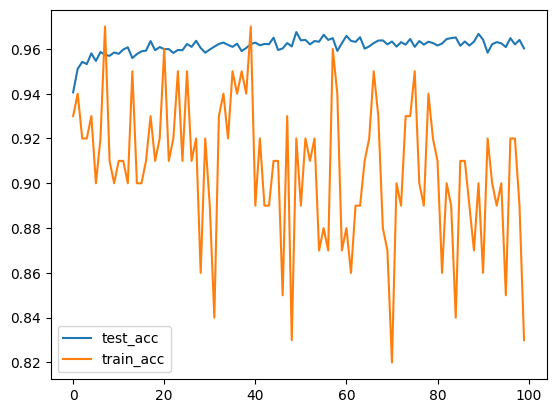

In [ ]:
""" visualization Result """
x_axis = np.arange(args.Iteration)
plt.plot(x_axis, test_acc, label='test_acc')
plt.plot(x_axis, train_acc, label='train_acc')
plt.legend()
plt.show


## Part 2(e)
Train the selected
network on a learned synthetic dataset (with 100 training images), then evaluate it on the
real testing data.

In [ ]:
args.dataset = 'MNIST'
it_eval = 20
args.model = 'ConvNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:01:59] Evaluate_20: epoch = 0100 train time = 4 s train loss = 0.417479 train acc = 0.8400, test acc = 0.9603
test with synthetic dataset, accuracy = 0.9603


### gaussian noise version

In [ ]:

args.dataset = 'MNIST'
it_eval = 20
args.model = 'ConvNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:02:06] Evaluate_20: epoch = 0100 train time = 4 s train loss = 0.474889 train acc = 0.8500, test acc = 0.9546
test with synthetic dataset, accuracy = 0.9546


# Part 3 Cross_architecture


## AlexNet - real dataset initialization

In [ ]:
args.model = 'AlexNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:02:14] Evaluate_20: epoch = 0100 train time = 5 s train loss = 1.727417 train acc = 0.4200, test acc = 0.7291
test with synthetic dataset, accuracy = 0.7291


## AlexNet -  gaussian noise version

In [ ]:
args.dataset = 'MNIST'
it_eval = 20
args.model = 'AlexNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:02:21] Evaluate_20: epoch = 0100 train time = 4 s train loss = 1.911242 train acc = 0.4200, test acc = 0.7058
test with synthetic dataset, accuracy = 0.7058


## VGG11 - real dataset initialization

In [ ]:
args.model = 'VGG11'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)
images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:02:30] Evaluate_20: epoch = 0100 train time = 5 s train loss = 0.225616 train acc = 0.9600, test acc = 0.9510
test with synthetic dataset, accuracy = 0.9510


## VGG11 - gaussian noise version

In [ ]:
args.model = 'VGG11'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)
images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-12-05 04:02:38] Evaluate_20: epoch = 0100 train time = 5 s train loss = 0.357423 train acc = 0.9100, test acc = 0.9297
test with synthetic dataset, accuracy = 0.9297
